# EDA Brain Tumor Classification

## Import Library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize

## Data Loading

In [2]:
# Data Labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
train_dir = 'dataset/Training'
test_dir = 'dataset/Testing'

X_train = [] #Training Dataset
Y_train = [] #Training Labels

image_size=224

for label in labels:
    path = os.path.join(train_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img))
        img_resized = resize(img_array, (image_size, image_size, 3))
        X_train.append(img_resized)
        Y_train.append(class_num)

for label in labels:
    path = os.path.join(test_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img))
        img_resized = resize(img_array, (image_size, image_size, 3))
        X_train.append(img_resized)
        Y_train.append(class_num)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [3]:
# Number of sample = 7023
X_train.shape

(7023, 224, 224, 3)

## Number of photos per class

In [4]:
def plot_class_distribution(Y, labels, title="Số lượng ảnh theo lớp"):
    """
    Vẽ biểu đồ số lượng ảnh theo từng lớp.
    
    Parameters:
        Y (list/array): nhãn (labels) của dataset
        labels (list): tên các lớp, index theo label
        title (str): tiêu đề biểu đồ
    """
    # Đếm số ảnh theo lớp
    unique, counts = np.unique(Y, return_counts=True)
    count_dict = dict(zip(unique, counts))
    
    print("Số lượng ảnh theo từng lớp:")
    for i, c in count_dict.items():
        print(f"{labels[i]}: {c}")
    
    # Vẽ biểu đồ với mỗi lớp một màu khác nhau
    plt.figure(figsize=(7,5))
    ax = sns.barplot(
        x=[labels[i] for i in unique],
        y=counts,
        palette="Set2"  
    )
    
    # Thêm số lượng trên mỗi cột
    for i, v in enumerate(counts):
        ax.text(i, v + max(counts)*0.01, str(v), ha='center', fontweight='bold')
    
    plt.title(title, fontsize=14)
    plt.ylabel("Số ảnh")
    plt.xlabel("Lớp")
    plt.show()


Số lượng ảnh theo từng lớp:
glioma: 1621
meningioma: 1645
notumor: 2000
pituitary: 1757


C:\Users\haotr\AppData\Local\Temp\ipykernel_2920\2492012198.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


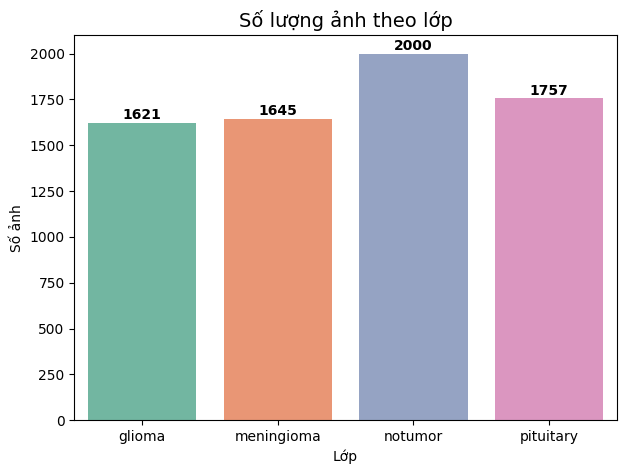

In [5]:
plot_class_distribution(Y_train, labels, title="Số lượng ảnh theo lớp")

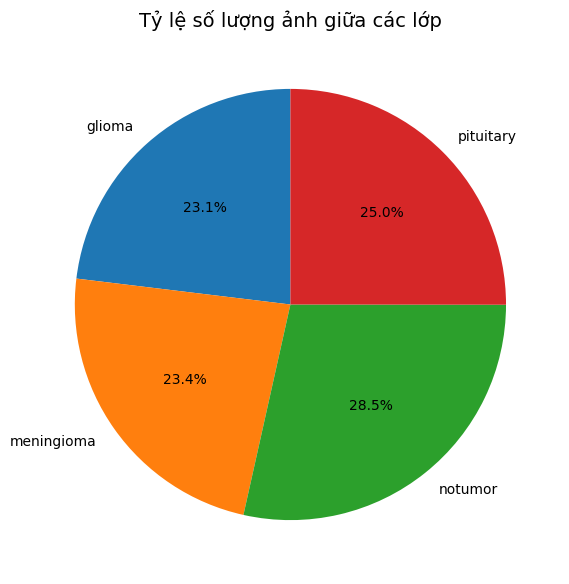

In [6]:
counts = [1621, 1645, 2000, 1757]

plt.figure(figsize=(7,7))
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Tỷ lệ số lượng ảnh giữa các lớp", fontsize=14)
plt.show()

“Bộ dữ liệu sau khi gộp và phân tích cho thấy số lượng ảnh giữa các lớp tương đối cân bằng, dao động từ 1621 đến 2000 ảnh. Sự chênh lệch giữa lớp lớn nhất và nhỏ nhất chỉ khoảng 5%, do đó mô hình có thể học tốt mà không gặp tình trạng mất cân bằng nghiêm trọng. Tuy nhiên, trong quá trình huấn luyện có thể áp dụng một số kỹ thuật tăng cường dữ liệu (data augmentation) như xoay, lật, thay đổi độ sáng nhằm nâng cao khả năng khái quát hóa.”

## Histogram pixel

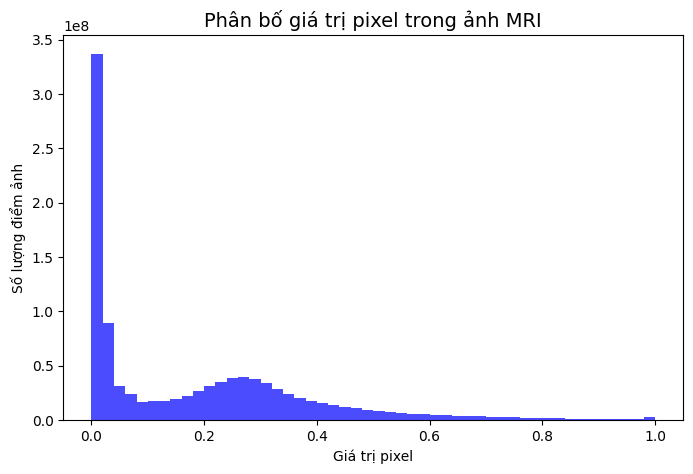

In [7]:
plt.figure(figsize=(8,5))
plt.hist(X_train.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Phân bố giá trị pixel trong ảnh MRI", fontsize=14)
plt.xlabel("Giá trị pixel")
plt.ylabel("Số lượng điểm ảnh")
plt.show()

## Display sample per class

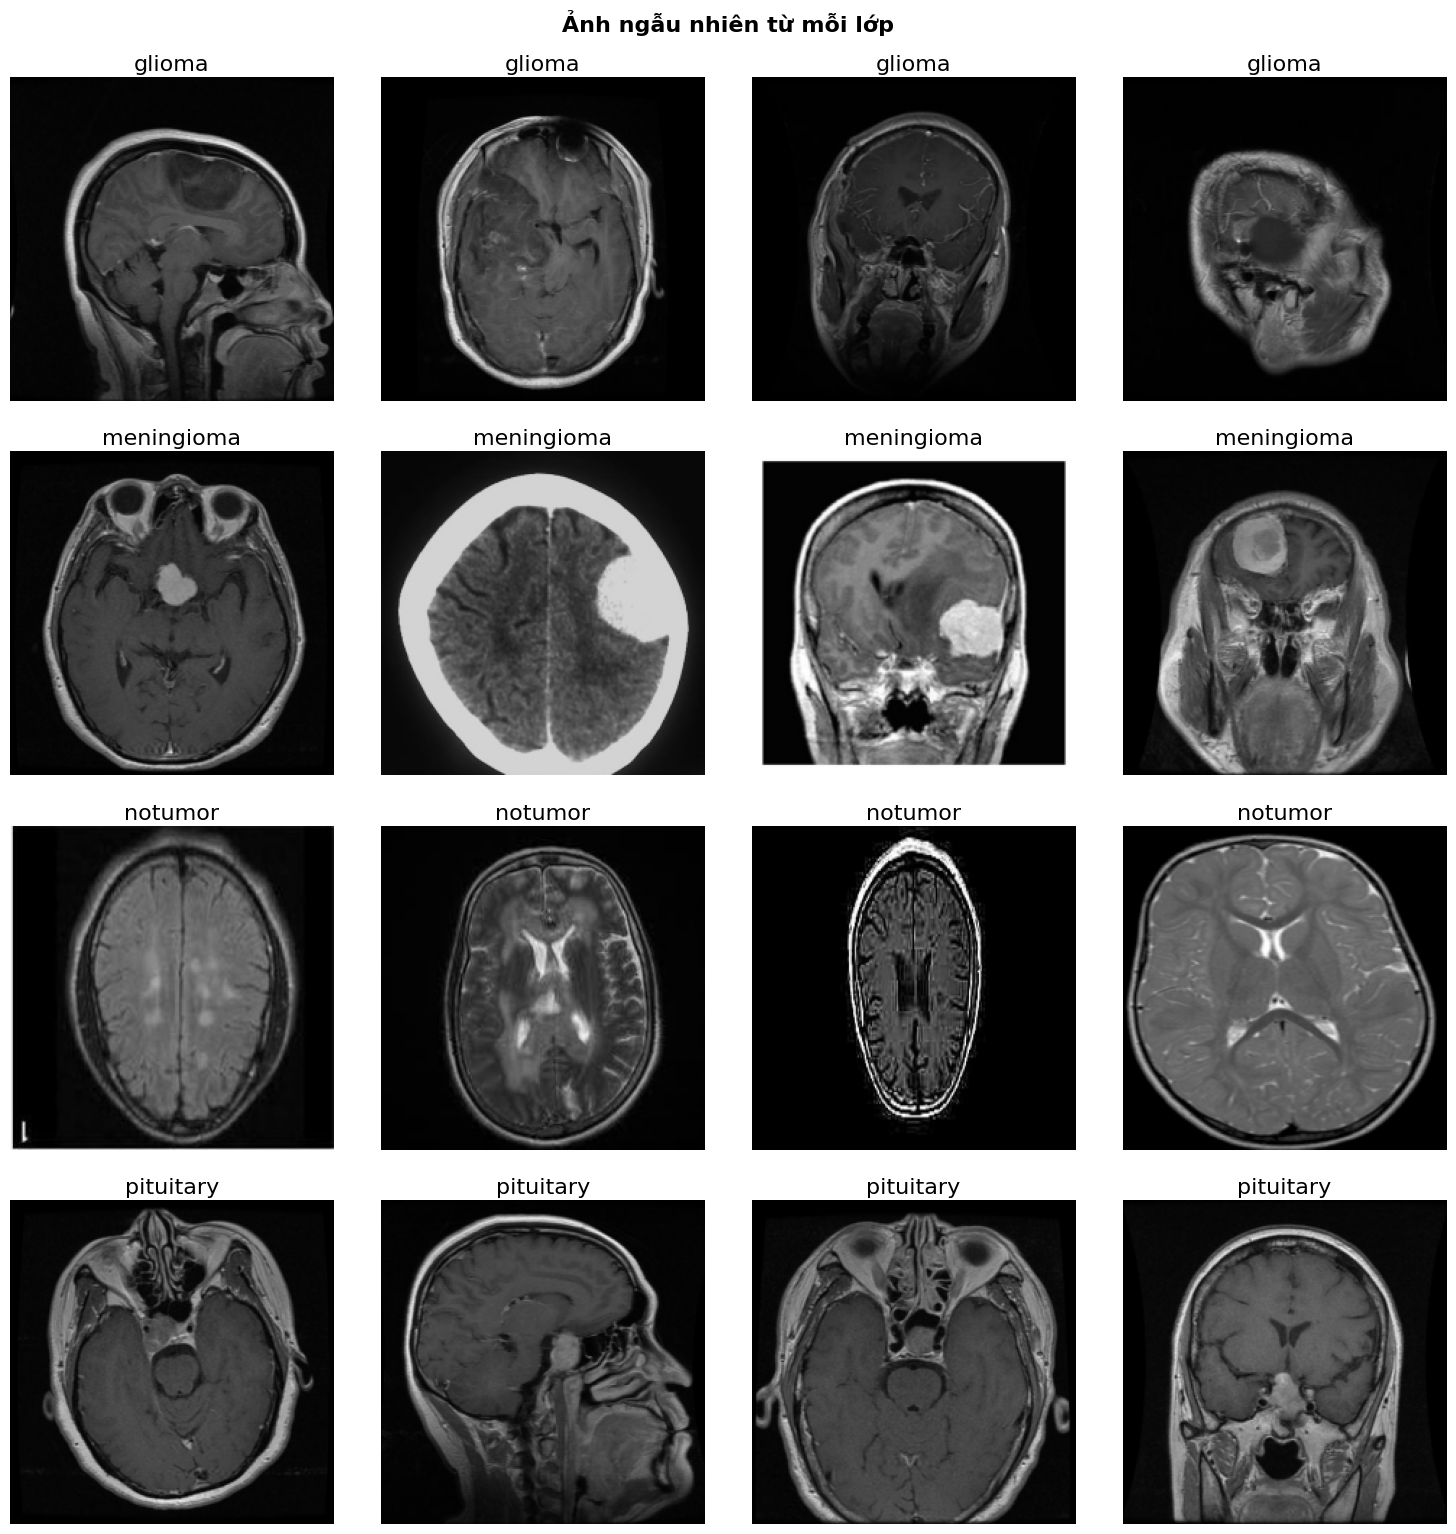

In [8]:
num_samples = 4  # số ảnh mỗi lớp
plt.figure(figsize=(15, 15))

for class_idx, label in enumerate(labels):
    # Lấy index ảnh thuộc lớp này
    idxs = np.where(Y_train == class_idx)[0]
    # Chọn ngẫu nhiên
    sample_idxs = np.random.choice(idxs, num_samples, replace=False)

    for i, idx in enumerate(sample_idxs):
        plt.subplot(len(labels), num_samples, class_idx * num_samples + i + 1)
        plt.imshow(X_train[idx])
        plt.axis("off")
        plt.title(label, fontsize=16, pad=5)

plt.tight_layout(h_pad=2.0)
plt.suptitle("Ảnh ngẫu nhiên từ mỗi lớp", fontsize=16, fontweight="bold", y=1.02)
plt.show()

## Shuffle & split data (70% Train - 10% Val - 20% Test)

In [9]:
from sklearn.model_selection import train_test_split

# Bước 1: shuffle & chia Train+Val (80%) và Test (20%)
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X_train, Y_train,
    test_size=0.2,
    stratify=Y_train,
    random_state=42, 
    shuffle=True
)

# Bước 2: chia Train (70%) và Validation (10%)
X_train_new, X_val, Y_train_new, Y_val = train_test_split(
    X_trainval, Y_trainval,
    test_size=0.125,   # ≈10% tổng dataset
    stratify=Y_trainval,
    random_state=42,
    shuffle=True
)

# Kiểm tra kích thước
print("Train:", X_train_new.shape, Y_train_new.shape)
print("Validation:", X_val.shape, Y_val.shape)
print("Test:", X_test.shape, Y_test.shape)

Train: (4915, 224, 224, 3) (4915,)
Validation: (703, 224, 224, 3) (703,)
Test: (1405, 224, 224, 3) (1405,)


### Pie chart train - val -test

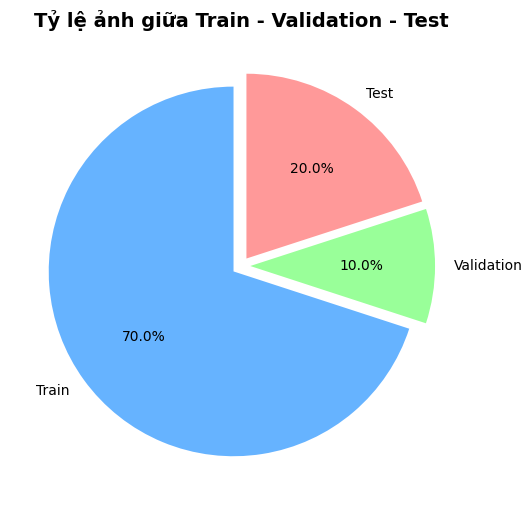

In [10]:
# Đếm số ảnh mỗi tập
sizes = [len(X_train_new), len(X_val), len(X_test)]
labels_pie = ["Train", "Validation", "Test"]
colors = ["#66b3ff", "#99ff99", "#ff9999"]

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels_pie, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05,0.05,0.05))
plt.title("Tỷ lệ ảnh giữa Train - Validation - Test", fontsize=14, fontweight="bold")
plt.show()

### Number of images per class of the datasets

Số lượng ảnh theo từng lớp:
glioma: 1135
meningioma: 1151
notumor: 1400
pituitary: 1229


C:\Users\haotr\AppData\Local\Temp\ipykernel_2920\2492012198.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


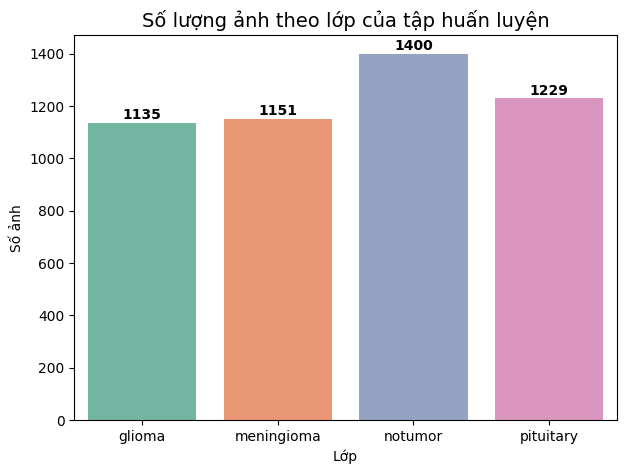

C:\Users\haotr\AppData\Local\Temp\ipykernel_2920\2492012198.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Số lượng ảnh theo từng lớp:
glioma: 162
meningioma: 165
notumor: 200
pituitary: 176


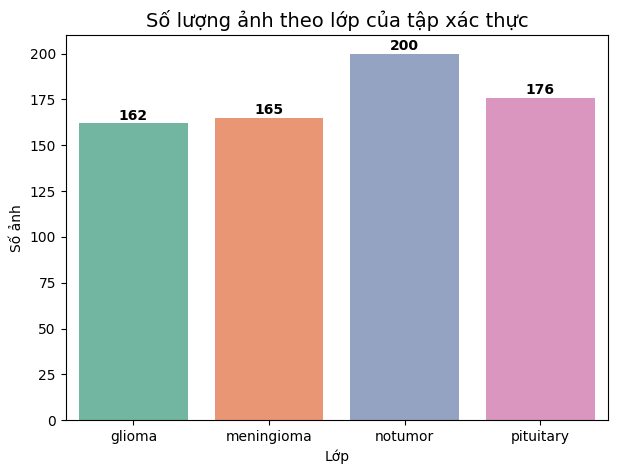

Số lượng ảnh theo từng lớp:
glioma: 324
meningioma: 329
notumor: 400
pituitary: 352


C:\Users\haotr\AppData\Local\Temp\ipykernel_2920\2492012198.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


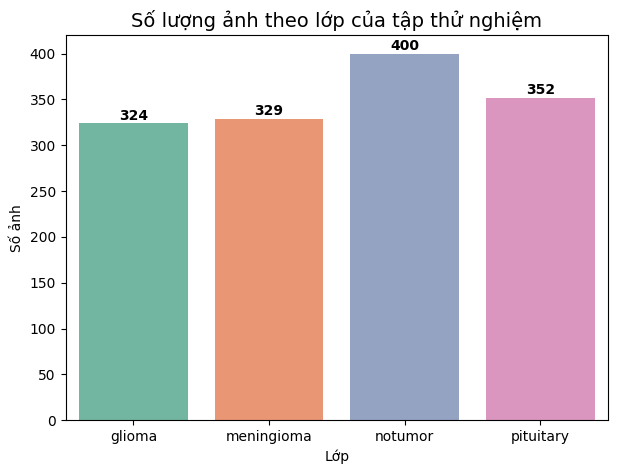

In [11]:
plot_class_distribution(Y_train_new, labels, title="Số lượng ảnh theo lớp của tập huấn luyện")
plot_class_distribution(Y_val, labels, title="Số lượng ảnh theo lớp của tập xác thực")
plot_class_distribution(Y_test, labels, title="Số lượng ảnh theo lớp của tập thử nghiệm")